# Predicting Real Estate valuation
#### Author: Jaleel Walter Henry Savoy


## Data
The data set being analyzed was sourced from the University of California - Irvine, Machine Learning Repository. The data set is comprised of 414 observations of historical real estate market data for New Taipei City in Taiwan. The target feature is the house price per unit area (10000 New Taiwan Dollars per Ping, where a Ping is about 3.3 meters squared). The predictor features are: transaction date, house age, distance to the nearest public transit station, number of convenience stores in the area, latitude, and longitude.

**Relevant Paper:**

Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.

Data Link Available at: [Web Link](https://archive.ics.uci.edu/ml/machine-learning-databases/00477/)

## Problem
Define and fit a machine learning model to predict house price per unit area (10000 Taiwan Dollars per Ping), using a subset of the remaining features in the data set, that performs wells on new observations.

The model will be able to aid in decision-making by using the comparable qualities (year of sale, age of house, distance to public transit, number of convenience stores in the area, and location through latitude and longitude) to predict the market selling price per unit area of a home.

## Benefits
The capability to accurately predict the market selling price per unit area of a home using comparable qualities is useful to investors and real-estate professionals. Real-estate valuation is concerned with the cost, price, and intrinsic value of the property; the cost or price of a property does not necessarily have to equal the value of a property, and often the value is not equal to the price or cost.

## Import Relevant Packages

In [549]:
library(caret)
library(car)
library(MASS)
library(corrplot)
library(mgcv)

## Load the Data

In [550]:
data <- (data.frame(read.csv('Real estate valuation data set.csv')))

## Split Data into Training and Testing sets

In [551]:
## 66-34 split of the sample data
sample_size <- floor(0.66 * nrow(data))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data)), size = sample_size)

train <- data[train_ind, ]
test <- data[-train_ind, ]

## Preliminary Exploration of the Training Data

[1] 117.5  78.0

271 
139

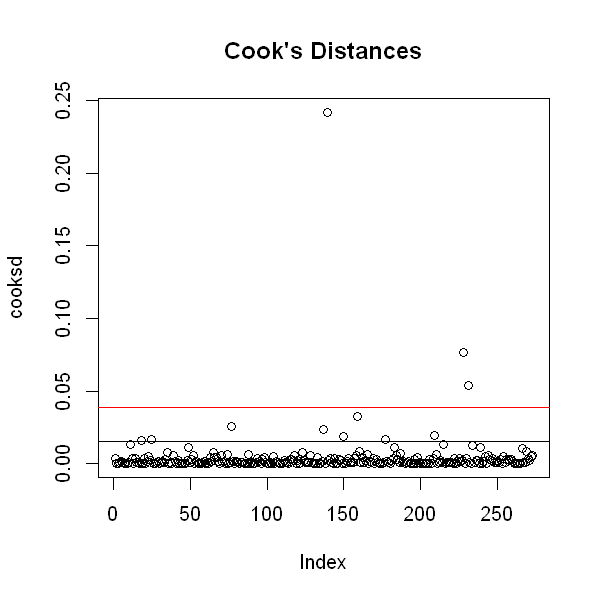

In [552]:
(outlier_values <- boxplot.stats(train$Y.house.price.of.unit.area)$out)
outlierMod <- lm(Y.house.price.of.unit.area ~ ., data=train)
cooksd <- cooks.distance(outlierMod)
plot(cooksd, main="Cook's Distances")
abline(h = 4*mean(cooksd, na.rm=T))
abline(h = quantile(cooksd, 0.99), col="red")
which(cooksd > 0.15)

     ï..No       X1.transaction.date  X2.house.age  
 Min.   :  1.0   Min.   :2013        Min.   : 0.00  
 1st Qu.:120.0   1st Qu.:2013        1st Qu.: 9.00  
 Median :219.0   Median :2013        Median :16.10  
 Mean   :216.5   Mean   :2013        Mean   :17.71  
 3rd Qu.:314.0   3rd Qu.:2013        3rd Qu.:28.40  
 Max.   :414.0   Max.   :2014        Max.   :41.30  
 X3.distance.to.the.nearest.MRT.station X4.number.of.convenience.stores
 Min.   :  23.38                        Min.   : 0.000                 
 1st Qu.: 289.32                        1st Qu.: 1.000                 
 Median : 490.35                        Median : 4.000                 
 Mean   :1020.44                        Mean   : 4.044                 
 3rd Qu.:1406.43                        3rd Qu.: 6.000                 
 Max.   :6488.02                        Max.   :10.000                 
  X5.latitude     X6.longitude   Y.house.price.of.unit.area
 Min.   :24.93   Min.   :121.5   Min.   :  7.60            
 1st 

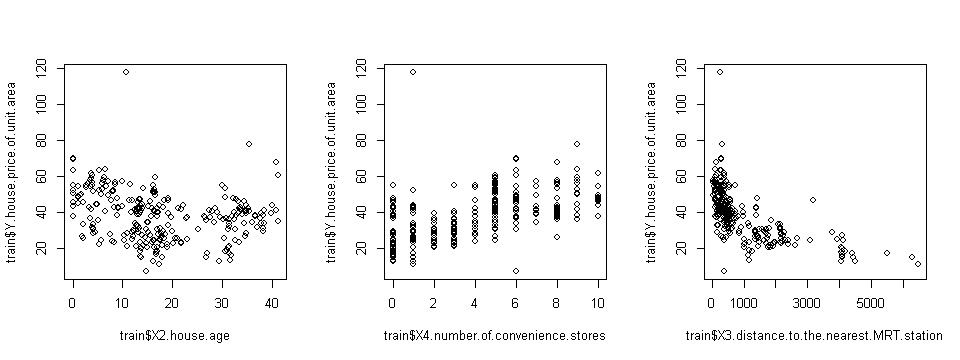

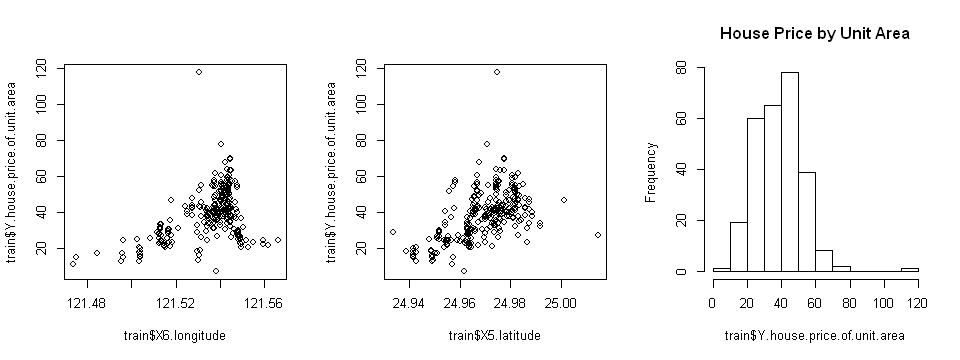

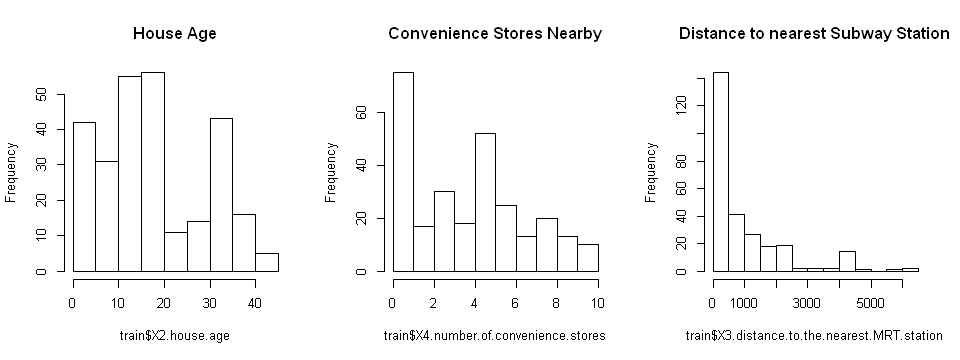

In [553]:
par(mfrow=c(1,3))
options(repr.plot.width=8, repr.plot.height=3)

summary(train)

plot(x=train$X2.house.age, y=train$Y.house.price.of.unit.area)
plot(x=train$X4.number.of.convenience.stores, y=train$Y.house.price.of.unit.area)
plot(x=train$X3.distance.to.the.nearest.MRT.station, y=train$Y.house.price.of.unit.area)
plot(x=train$X6.longitude, y=train$Y.house.price.of.unit.area)
plot(x=train$X5.latitude, y=train$Y.house.price.of.unit.area)

hist(train$Y.house.price.of.unit.area, main="House Price by Unit Area")
hist(train$X2.house.age, main="House Age")
hist(train$X4.number.of.convenience.stores, main="Convenience Stores Nearby")
hist(train$X3.distance.to.the.nearest.MRT.station, main="Distance to nearest Subway Station")

In [554]:
colnames(train) <- c("Index", "Trans.Date", "House.Age", "Distance.MRT.Station",
                     "Num.Convenience.Stores", "Lat", "Long", "House.Price.Unit.Area")
colnames(test) <- c("Index", "Trans.Date", "House.Age", "Distance.MRT.Station",
                     "Num.Convenience.Stores", "Lat", "Long", "House.Price.Unit.Area")

,Index,Trans.Date,House.Age,Distance.MRT.Station,Num.Convenience.Stores,Lat,Long,House.Price.Unit.Area
Index,1.000000000,-0.052368161,-0.0641866574,0.03565465,-0.008363125,-0.003635433,-0.0687202568,-0.007641409
Trans.Date,-0.052368161,1.000000000,-0.0629781791,0.04480016,-0.003808806,0.029503859,-0.0152197925,0.100632882
House.Age,-0.064186657,-0.062978179,1.0000000000,-0.03007540,0.060780318,0.029051618,0.0005571897,-0.234728793
Distance.MRT.Station,0.035654649,0.044800159,-0.0300754019,1.00000000,-0.573698559,-0.516946303,-0.7807440421,-0.647945109
Num.Convenience.Stores,-0.008363125,-0.003808806,0.0607803177,-0.57369856,1.000000000,0.384426692,0.4183558909,0.538969551
Lat,-0.003635433,0.029503859,0.0290516176,-0.51694630,0.384426692,1.000000000,0.3327100317,0.529673071
Long,-0.068720257,-0.015219792,0.0005571897,-0.78074404,0.418355891,0.332710032,1.0000000000,0.468066293
House.Price.Unit.Area,-0.007641409,0.100632882,-0.2347287927,-0.64794511,0.538969551,0.529673071,0.4680662930,1.000000000


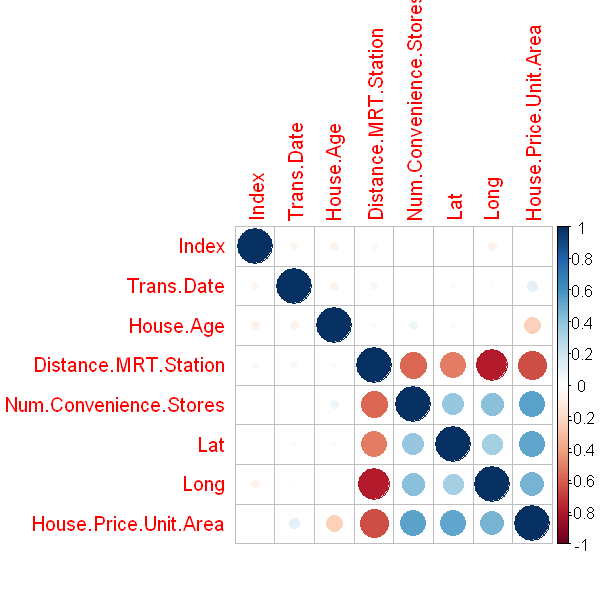

In [555]:
par(mfrow=c(1,1))
mar=c(0,0,1,0)
options(repr.plot.width=5, repr.plot.height=5)
cor(train)
corrplot(cor(train))

## Key Takeaways from the Exploration
* The Target has a strong, negative correlation with the distance to the nearest MRT subway station, so moving further from public transit correlates to a lower House Price of Unit Area 
* The Target has a strong, positive correlation with the longitude feature, so moving further from the Meridan is correlated with a higher House Price of Unit Area
* The Target has a strong, positive correlation with the latitude feature, so moving further from the equator is correlated with a higher House Price of Unit Area
* The Target has a strong, positive correlation with the number of convenience stores the property, so the more convenience stores nearby correlates to a higher House Price of Unit Area
* The Target has a weak, negative correlation with the House Age, so the older the house correlates to lower House Price of Unit Area
* There appears to be some multi-collinearity between the predictors, so that should be investigated when modelling
* The squared-value of Housing Age might be useful for predicting the target
* The interaction of latitude and longitude might be useful

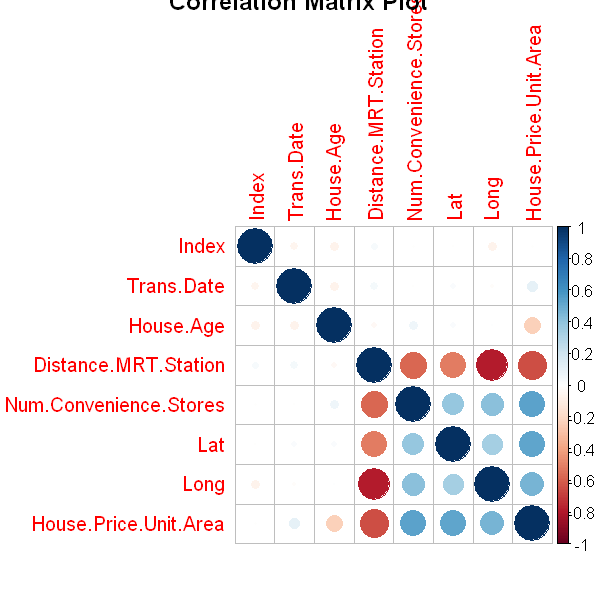

In [556]:
corrplot(cor(train), main="Correlation Matrix Plot", sub="Figure 10")

## Data Modeling
A statistical learning model must be crafted to solve the problem of predicting House Price per Unit Area. The model will learn a function to map the input predictors to the target output variable, using training data; the model will be assessed by its predictive capabilities on test data. 

Some things to consider, there is a limited amount of observations available and there is a limited features available. Due to the limited amount of data available, the approach for this analysis will be consider parametric, and semi-parametric, statistical learning algorithms; parametric statistical learning algorithms assumes a functional form that constrains the hypothesis space and limits complexity. Some disadvantages of the parametric models is that they are relatively inflexible and their assumed functional forms are unlikely to exactly match the true mapping function of the inputs and the target(s). Some Advantages are the simplicity, speed, and relatively intuitive interpretatbility. Semi-parametric models provide extended flexibility with the trade-off being some of the interpretability; these approaches are a decent compromise being the parametric and non-parametric approaches.

### Initial Multiple Linear Regression Model
The initial Model will contain all possible features in a multiple linear regression model with polynomial terms and interaction terms where reasonable.

In [557]:
model1 <- lm(House.Price.Unit.Area ~ 
             Trans.Date + 
             House.Age +
             Distance.MRT.Station +
             Num.Convenience.Stores + 
             Lat + 
             Long +
             1,
             data = train
)

summary(model1)
BIC(model1)
print(mean(abs((model1$residuals))))


Call:
lm(formula = House.Price.Unit.Area ~ Trans.Date + House.Age + 
    Distance.MRT.Station + Num.Convenience.Stores + Lat + Long + 
    1, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.530  -4.981  -0.902   4.584  73.900 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -9.611e+03  8.207e+03  -1.171   0.2426    
Trans.Date              4.763e+00  1.939e+00   2.457   0.0147 *  
House.Age              -3.139e-01  4.738e-02  -6.626 1.91e-10 ***
Distance.MRT.Station   -5.183e-03  8.623e-04  -6.011 6.04e-09 ***
Num.Convenience.Stores  1.058e+00  2.236e-01   4.729 3.66e-06 ***
Lat                     2.614e+02  5.332e+01   4.902 1.65e-06 ***
Long                   -5.315e+01  5.861e+01  -0.907   0.3654    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.809 on 266 degrees of freedom
Multiple R-squared:  0.5849,	Adjusted R-squared:  0.5755 
F-statistic: 62.47 on 6

[1] 2000.519

[1] 5.90709


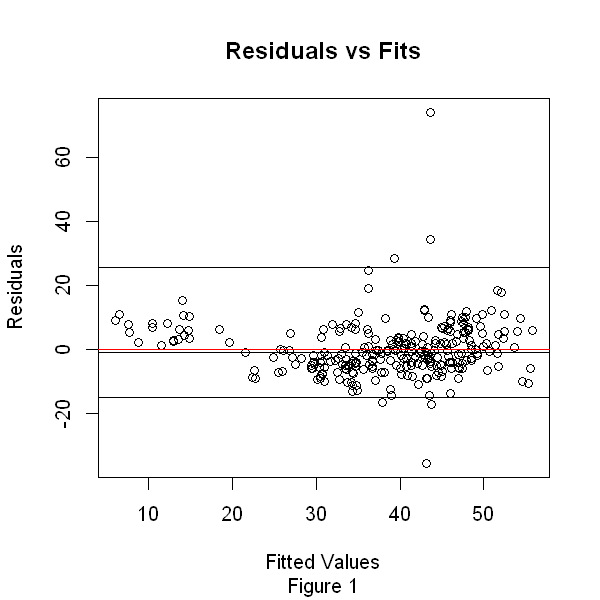

In [558]:
plot(y=resid(model1), model1$fitted.values,
     main="Residuals vs Fits",
     ylab="Residuals", 
     xlab="Fitted Values",
     sub="Figure 1")
abline(h=quantile(model1$residuals, prob=0.01))
abline(h=quantile(model1$residuals, prob=0.50))
abline(h=quantile(model1$residuals, prob=0.99))
abline(h=0, col="red")

In [559]:
predictions1 <- (predict(model1, newdata=test))
test_errors1 <- (predictions1-test$House.Price.Unit.Area)
ape1 <- abs(test_errors1)/test$House.Price.Unit.Area
ae1 <- abs(test_errors1)
mae1 <- mean(ae1)
mape1 <- mean(ape1)
predictionDF2 <- cbind("predictions"=predictions1,
                      "actual obs"=test$House.Price.Unit.Area,
                      "error"=(test_errors1),
                      "abs error" = ae1,
                      "abs % error"= ape1)
print(paste("MAE: ", mae1))
print(paste("MAPE: ", mape1))
(head(predictionDF1))

[1] "MAE:  6.58455299219199"
[1] "MAPE:  0.199878204193001"


,predictions1,,,
2,48.08720,42.2,5.8872033,34.6591629
4,48.88359,54.8,-5.9164103,35.0039109
5,47.16399,43.1,4.0639861,16.5159834
6,31.67391,32.1,-0.4260927,0.1815550
7,38.33007,40.3,-1.9699302,3.8806249
8,47.01715,46.7,0.3171462,0.1005817


### Refining the Multiple Linear Regression Model
The visual assessment of the residuals seems to indicate the linearity condition is violated; the residuals imply that the fit of the relationship between the target and the predictors is not strictly linear, so that must be accounted for that with higher-order terms of some of the predictors. From our preliminary data exploration, it seemed that House Age and Distance to MRT Station are predictors that may benefit from higher-order terms.

In [560]:
model2 <- lm(House.Price.Unit.Area ~ 
             Trans.Date + 
             House.Age + I(House.Age**2) + I(House.Age**3) + 
             Distance.MRT.Station + I(Distance.MRT.Station**2) + I(Distance.MRT.Station**3) + 
             Num.Convenience.Stores + 
             Lat + 
             Long +
             1,
             data = train
)

summary(model2)
AIC(model2)
print(mean(abs((model2$residuals))))


Call:
lm(formula = House.Price.Unit.Area ~ Trans.Date + House.Age + 
    I(House.Age^2) + I(House.Age^3) + Distance.MRT.Station + 
    I(Distance.MRT.Station^2) + I(Distance.MRT.Station^3) + Num.Convenience.Stores + 
    Lat + Long + 1, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.555  -3.358  -0.049   3.050  68.944 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -1.872e+04  7.210e+03  -2.596  0.00996 ** 
Trans.Date                 6.299e+00  1.692e+00   3.724  0.00024 ***
House.Age                 -4.594e-01  3.485e-01  -1.318  0.18856    
I(House.Age^2)            -1.732e-02  2.143e-02  -0.808  0.41973    
I(House.Age^3)             5.823e-04  3.676e-04   1.584  0.11441    
Distance.MRT.Station      -2.292e-02  2.581e-03  -8.882  < 2e-16 ***
I(Distance.MRT.Station^2)  7.154e-06  1.115e-06   6.418 6.44e-10 ***
I(Distance.MRT.Station^3) -6.813e-10  1.313e-10  -5.188 4.25e-07 ***
Num.Convenience.St

[1] 1895.797

[1] 4.593541


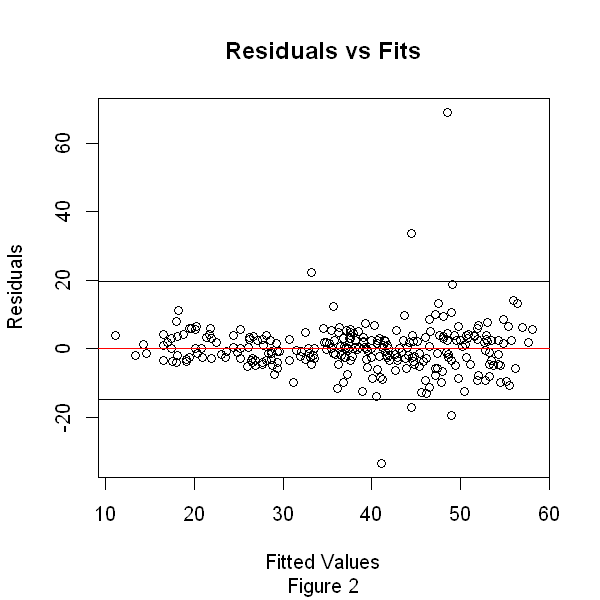

In [561]:
plot(y=model2$residuals, model2$fitted.values,
     main="Residuals vs Fits",
     ylab="Residuals", 
     xlab="Fitted Values",
     sub="Figure 2")
abline(h=quantile(model2$residuals, prob=0.01))
abline(h=quantile(model2$residuals, prob=0.50))
abline(h=quantile(model2$residuals, prob=0.99))
abline(h=0, col="red")

In [583]:
predictions2 <- data.frame(predict(model2, newdata=test, interval="predict"))
test_errors2 <- (test$House.Price.Unit.Area-predictions2$fit)
ape2 <- abs(test_errors2)/test$House.Price.Unit.Area
ae2 <- abs(test_errors2)
mae2 <- mean(ae2)
mape2 <- mean(ape2)
predictionDF2 <- cbind(
    "actual obs"=test$House.Price.Unit.Area,
    "predictions"=predictions2,
    "abs error" = ae2,
    "abs % error"= ape2)
print(paste("MAE: ", mae2))
print(paste("MAPE: ", mape2))
(head(predictionDF2))

[1] "MAE:  5.5688019392611"
[1] "MAPE:  0.164218118583633"


,actual obs,predictions.fit,predictions.lwr,predictions.upr,abs error,abs % error
2,42.2,44.39229,29.20795,59.57662,2.1922878,0.051949949
4,54.8,47.86109,32.69671,63.02548,6.9389073,0.126622396
5,43.1,49.16028,34.02782,64.29273,6.0602752,0.140609634
6,32.1,26.36965,11.03757,41.70173,5.7303481,0.178515519
7,40.3,35.21792,19.97768,50.45816,5.0820798,0.126106199
8,46.7,46.46833,31.32938,61.60727,0.2316749,0.004960919


### Finalizing the Multiple Linear Regression Model
The visual assessment of the residuals seems to indicate the equal variance condition is violated; the response will be log-transformed to address this concern. The longitude feature did not contribue much to the model, so it will be dropped in the final model.

In [563]:
model3 <- lm(I(log(House.Price.Unit.Area)) ~
             Trans.Date + 
             House.Age + I(House.Age**2) + I(House.Age**3) +  
             Distance.MRT.Station + I(Distance.MRT.Station**2) + I(Distance.MRT.Station**3) +
             Lat + 
             Num.Convenience.Stores + 
             1,
             data = train
)

summary(model3)
AIC(model3)
print(mean(abs((model3$residuals))))


Call:
lm(formula = I(log(House.Price.Unit.Area)) ~ Trans.Date + House.Age + 
    I(House.Age^2) + I(House.Age^3) + Distance.MRT.Station + 
    I(Distance.MRT.Station^2) + I(Distance.MRT.Station^3) + Lat + 
    Num.Convenience.Stores + 1, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.62062 -0.09276  0.01869  0.09919  0.92191 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -5.705e+02  8.972e+01  -6.358 8.97e-10 ***
Trans.Date                 1.591e-01  4.266e-02   3.731 0.000234 ***
House.Age                 -1.103e-02  8.779e-03  -1.256 0.210289    
I(House.Age^2)            -4.880e-04  5.396e-04  -0.904 0.366617    
I(House.Age^3)             1.585e-05  9.258e-06   1.712 0.088091 .  
Distance.MRT.Station      -5.602e-04  6.451e-05  -8.683 4.14e-16 ***
I(Distance.MRT.Station^2)  1.742e-07  2.807e-08   6.205 2.12e-09 ***
I(Distance.MRT.Station^3) -1.790e-11  3.310e-12  -5.407 1.44e-07 ***
Lat    

[1] -114.4324

[1] 0.1248936


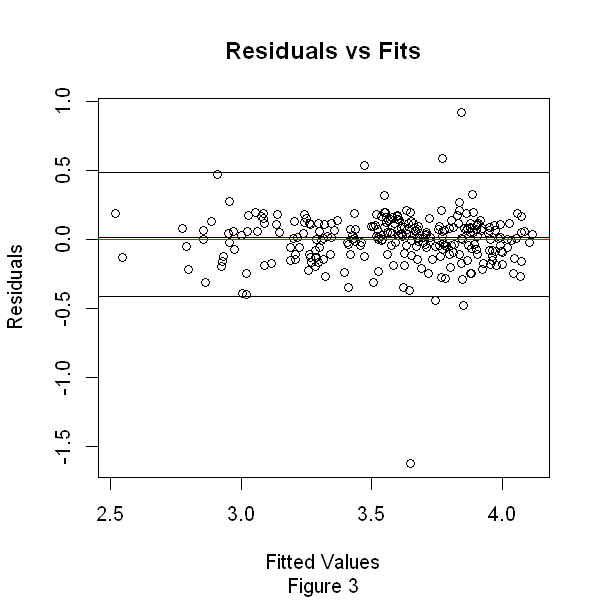

In [564]:
plot(y=model3$residuals, model3$fitted.values,
     main="Residuals vs Fits",
     ylab="Residuals", 
     xlab="Fitted Values",
     sub="Figure 3")
abline(h=quantile(model3$residuals, prob=0.01))
abline(h=quantile(model3$residuals, prob=0.50))
abline(h=quantile(model3$residuals, prob=0.99))
abline(h=0, col="red")

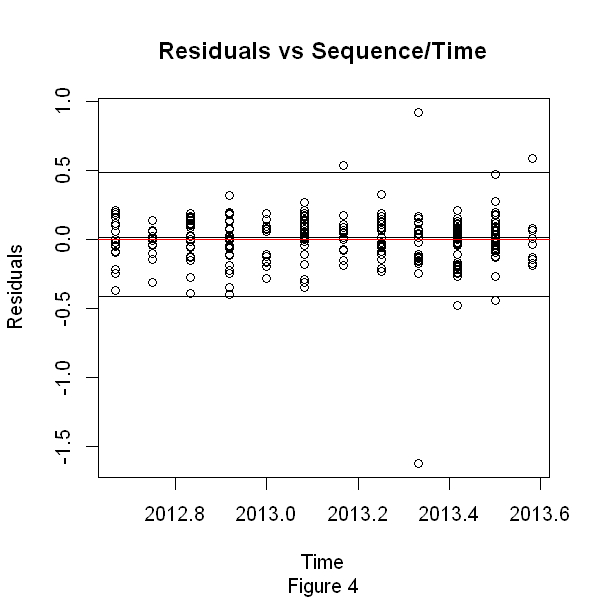

In [565]:
plot(y=model3$residuals, ts(model3$model$Trans.Date),
     main="Residuals vs Sequence/Time",
     ylab="Residuals", 
     xlab="Time",
     sub="Figure 4")
abline(h=quantile(model3$residuals, prob=0.01))
abline(h=quantile(model3$residuals, prob=0.50))
abline(h=quantile(model3$residuals, prob=0.99))
abline(h=0, col="red")

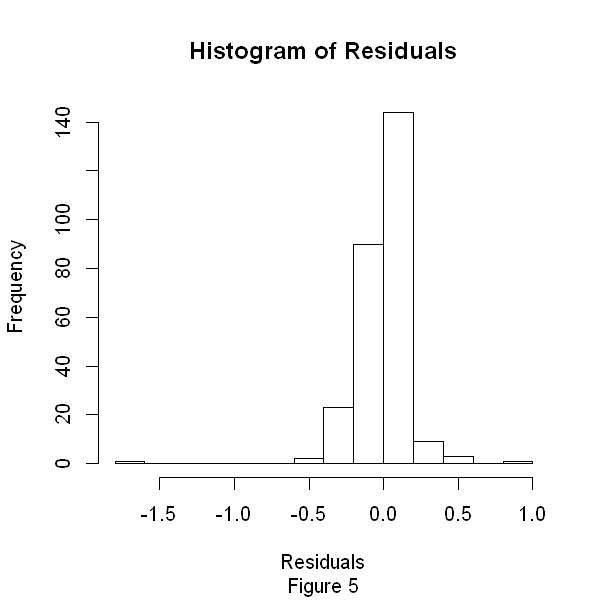

271 114 
139 159

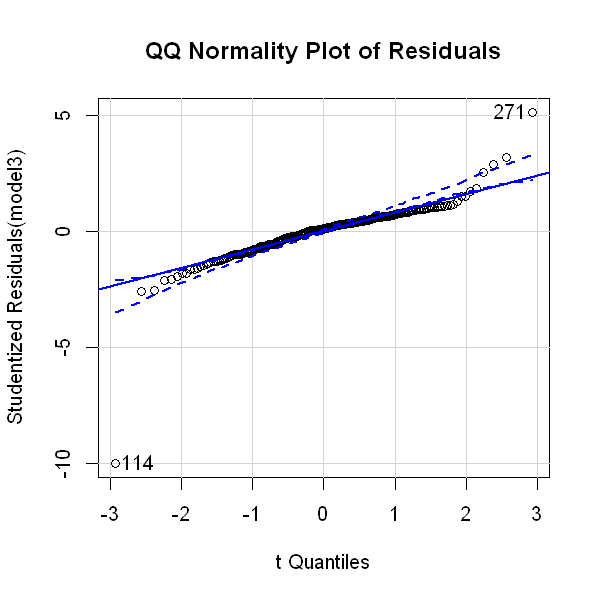

In [566]:
hist(model3$residuals,
     main="Histogram of Residuals",
     ylab="Frequency", 
     xlab="Residuals",
     sub="Figure 5")

qqPlot(model3, main = "QQ Normality Plot of Residuals")

In [581]:
predictions3 <- data.frame(exp(predict(model3, newdata=test, interval="predict")))
test_errors3 <- (test$House.Price.Unit.Area-predictions3$fit)
ape3 <- abs(test_errors3)/test$House.Price.Unit.Area
ae3 <- abs(test_errors3)
mae3 <- mean(ae3)
mape3 <- mean(ape3)
predictionDF3 <- cbind(
    "actual obs"=test$House.Price.Unit.Area,
    "predictions"=predictions3,
    "abs error" = ae3,
    "abs % error"= ape3)
print(paste("MAE: ", mae3))
print(paste("MAPE: ", mape3))
(head(predictionDF3))

[1] "MAE:  5.50401683761115"
[1] "MAPE:  0.157725986215554"


,actual obs,predictions.fit,predictions.lwr,predictions.upr,abs error,abs % error
2,42.2,43.96307,29.97475,64.47933,1.7630737,0.04177900
4,54.8,48.39790,33.02634,70.92389,6.4021032,0.11682670
5,43.1,48.95991,33.42831,71.70787,5.8599073,0.13596073
6,32.1,25.96132,17.65582,38.17383,6.1386761,0.19123601
7,40.3,34.85428,23.73074,51.19187,5.4457156,0.13512942
8,46.7,45.88479,31.32256,67.21717,0.8152083,0.01745628


## Multiple Linear Regression Model Evaluation
### LINE Conditions
#### Linearity
By visually assessing **Figure 3**, the residuals look good; they appear to randomly bounce around the residual = 0 with no systematic pattern, which validates the linearity condition
    
#### Independence of Residuals
By visually assessing **Figure 4** it appears that the residuals do not show signs of autocorrelation; the residuals appear to be independent of those immediately proceeding and following.

#### Normality of Residuals
**Figure 5** and the corresponding QQ Normality Plot shows some slightly concerning signs. The residuals deviate from normality towards the extreme values of the right-tail. Overall, it looks like the residuals are still approximately normal, at least close enough for the model to still be valid. Earlier in our preliminary data exploration we saw that a couple data points were outliers.
    
#### Equal Variance of Residuals
The residuals form a rough horizontal band around the residual = 0 line, which validates the equal variance assumption for the model.

## Generalized Additive Model
The Generalized additive model is a semi-parametric approach and it is an extension of the linear model that allows for more flexibility; while the linear model assumes a linear relationship between the features and the response, the generalized additive models allow for curvilinear relationships to be fit by, and while maintaining additivity, using non-linear functions of the features. The idea behind generalized additive models is that the association between each individual feature and the response follow a pattern that may be linear or nonlinear and these individual relationships can be estimated and subsequently added up to predict the response. Though we lose a bit in the way of intuitive interpretation of the model, we can still observe the effects of each feature due to the additive nature of the model. The main drawback is also related to the additive nature of the model. Also important to note is that the flexibility of the predictor functions can uncover patterns hidden deep in the data and the regularization of the predictor functions can help prevent overfitting to the training data. 

We observed that there is a curvilinear relationship between the features and the response, so a generalized additive model should be an appropriate approach to pursue. We will fit a generalized additive model that matches the performance of the finalized multiple linear regression above without the need to specify the higher-order terms of the model.

In [861]:
modelGAM <- gam((House.Price.Unit.Area) ~ 1 +
                (Trans.Date) + 
                s((House.Age)) +
                s(Distance.MRT.Station) +
                (Lat) +
                (Num.Convenience.Stores),family=quasi(link = "identity", variance = "mu"), 
                data=train, optimizer=c("outer", "newton"), drop.unused.levels=FALSE,
                control=c(
                gam.control(nthreads=1,irls.reg=0.0,epsilon = 5e-08, maxit = 2000, edge.correct=TRUE)))
summary(modelGAM)
print(mean(abs((modelGAM$residuals))))


Family: quasi 
Link function: identity 

Formula:
(House.Price.Unit.Area) ~ 1 + (Trans.Date) + s((House.Age)) + 
    s(Distance.MRT.Station) + (Lat) + (Num.Convenience.Stores)

Parametric coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.893e+04  3.154e+03  -6.003 6.51e-09 ***
Trans.Date              5.626e+00  1.481e+00   3.798 0.000182 ***
Lat                     3.061e+02  4.264e+01   7.180 7.41e-12 ***
Num.Convenience.Stores  4.296e-01  2.232e-01   1.925 0.055338 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                          edf Ref.df     F  p-value    
s(House.Age)            6.012  7.176 10.54 5.61e-12 ***
s(Distance.MRT.Station) 4.370  5.319 24.37  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.687   Deviance explained = 74.5%
GCV = 1.3471  Scale est. = 1.3509    n = 273

[1] 5.053171


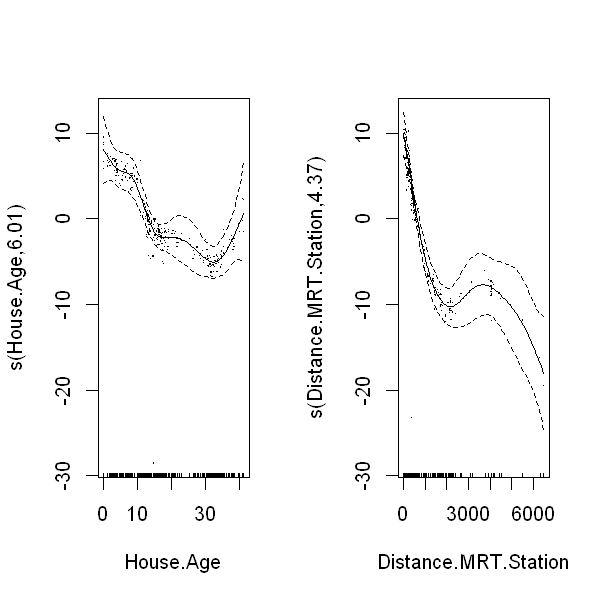


Method: GCV   Optimizer: outer newton
full convergence after 6 iterations.
Gradient range [9.102575e-10,4.796826e-08]
(score 1.347083 & scale 1.350913).
Hessian positive definite, eigenvalue range [0.002899553,0.007613603].
Model rank =  22 / 22 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                          k'  edf k-index p-value
s(House.Age)            9.00 6.01    0.97    0.38
s(Distance.MRT.Station) 9.00 4.37    0.94    0.20


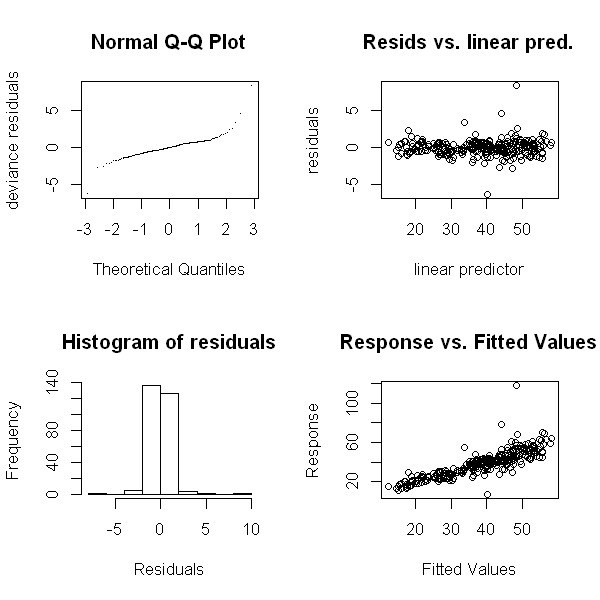

In [862]:
par(mfrow=c(1,2))
plot(modelGAM,residuals=TRUE)
gam.check(modelGAM)

In [863]:
predictions4 <- (predict.gam(modelGAM, newdata=test,type = "response"))
test_errors4 <- (test$House.Price.Unit.Area - predictions4)
ae4 <- abs(test_errors4)
ape4 <- abs(test_errors4)/test$House.Price.Unit.Area
mae4 <- mean(ae4)
mape4 <- mean(ape4)

predictionDF4 <- cbind(
    "actual obs"=test$House.Price.Unit.Area,
    "predictions"=predictions4,
    "abs error" = ae4,
    "abs % error"= ape4)
print(paste("MAE: ", mae4))
print(paste("MAPE: ", mape4))
(head(predictionDF4))

[1] "MAE:  5.5528064877687"
[1] "MAPE:  0.1626488353114"


,actual obs,predictions,abs error,abs % error
2,42.2,45.49378,3.2937763,0.07805157
4,54.8,47.06698,7.7330240,0.14111358
5,43.1,49.41692,6.3169153,0.14656416
6,32.1,28.16662,3.9333837,0.12253532
7,40.3,35.48396,4.8160430,0.11950479
8,46.7,47.35538,0.6553782,0.01403380
